In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [18]:
df = pd.read_parquet('cleanedData.parquet')

In [3]:
df.head()

,date,category,cleanedContent,hashtagVal
0,2022-12-30,Hispanic Centers,Do you remember when Trump was in…that Chinese...,[]
1,2022-12-30,Hispanic Centers,Sardine smelling white folks stay up to date o...,[]
2,2022-12-30,Hispanic Centers,There was a man burned alive in one of those B...,[]
3,2022-12-30,Hispanic Centers,"I mean, i totally get it. I'm not saying he dr...",[]
4,2022-12-30,Hispanic Centers,Not when they were going rot murder the trucke...,[]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14616848 entries, 0 to 14616847
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   category        object        
 2   cleanedContent  object        
 3   hashtagVal      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 446.1+ MB


In [19]:
df['category'].value_counts()

category
Big Cities                6882413
Graying America           3231476
Exurbs                    1221011
Rural Middle America       861005
Evangelical Hubs           759207
College Towns              698954
Hispanic Centers           239017
Middle Suburbs             219282
Urban Suburbs              168915
Working Class Country      128158
African American South      95981
Aging Farmlands             68352
Military Posts              24404
Native American Lands       11812
LDS Enclaves                 6861
Name: count, dtype: int64

In [20]:
tweets_per_month = df['date'].dt.strftime('%Y-%m').value_counts().sort_index().reset_index(name='counts')

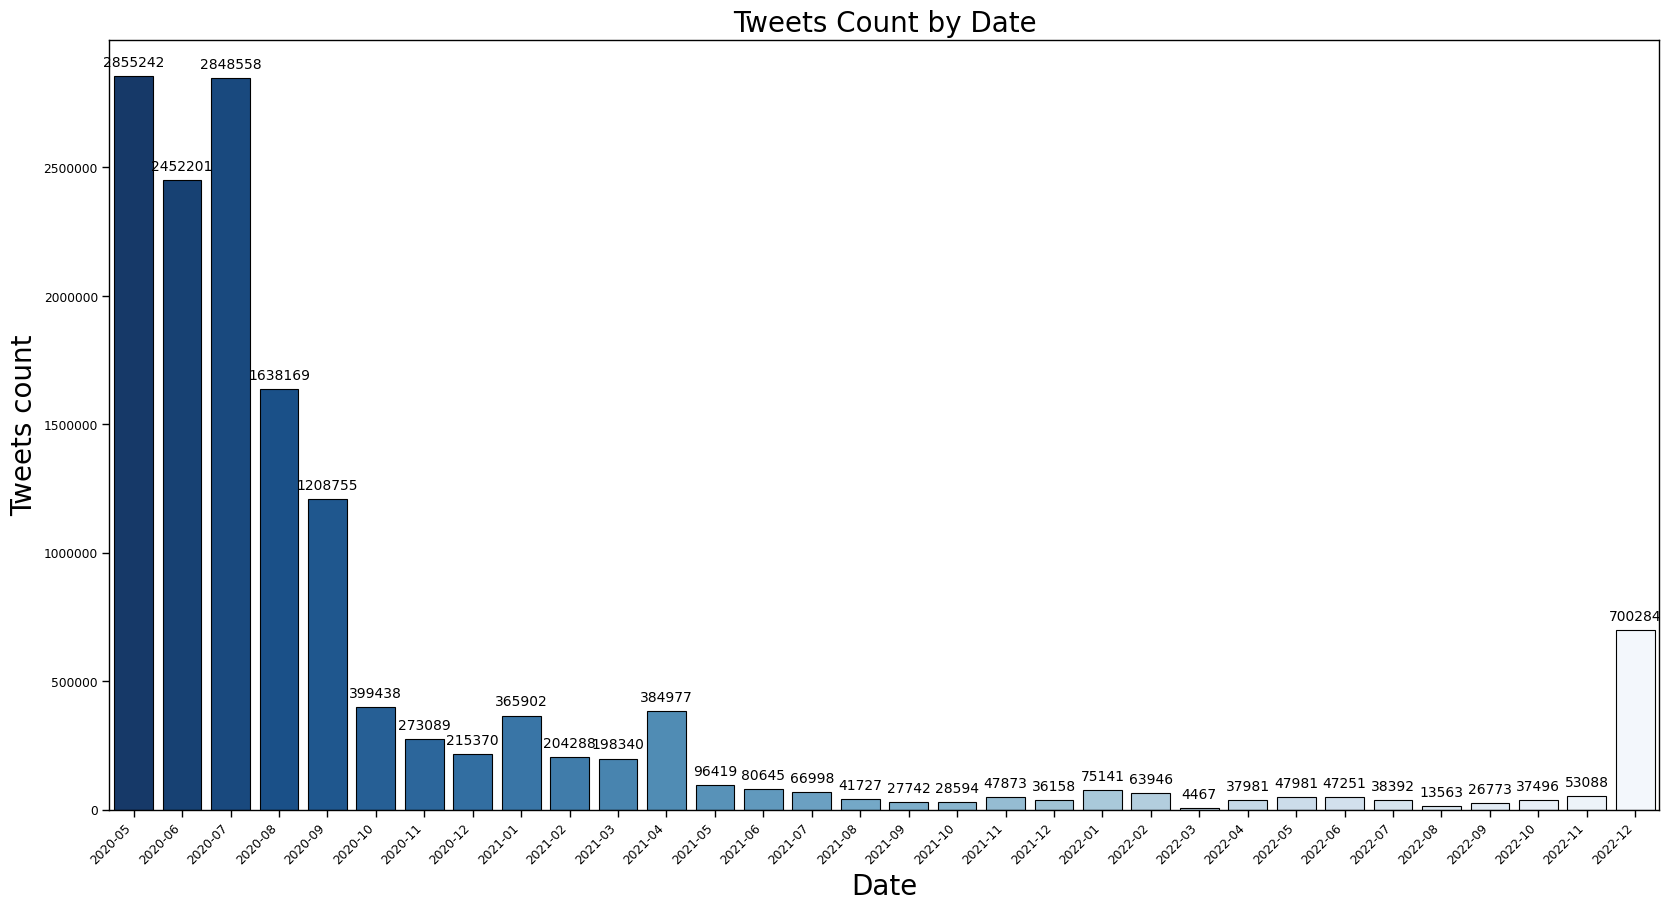

In [57]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='date', y='counts', data=tweets_per_month, edgecolor = 'black',errorbar=('ci', False), palette='Blues_r')
plt.title('Tweets Count by Date', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%.0f',padding=5, fontsize=10)
plt.ylabel('Tweets count', fontsize=20)
plt.xlabel('Date', fontsize=20)
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

In [58]:
tweets_per_country = df['category'].value_counts().reset_index(name='counts')

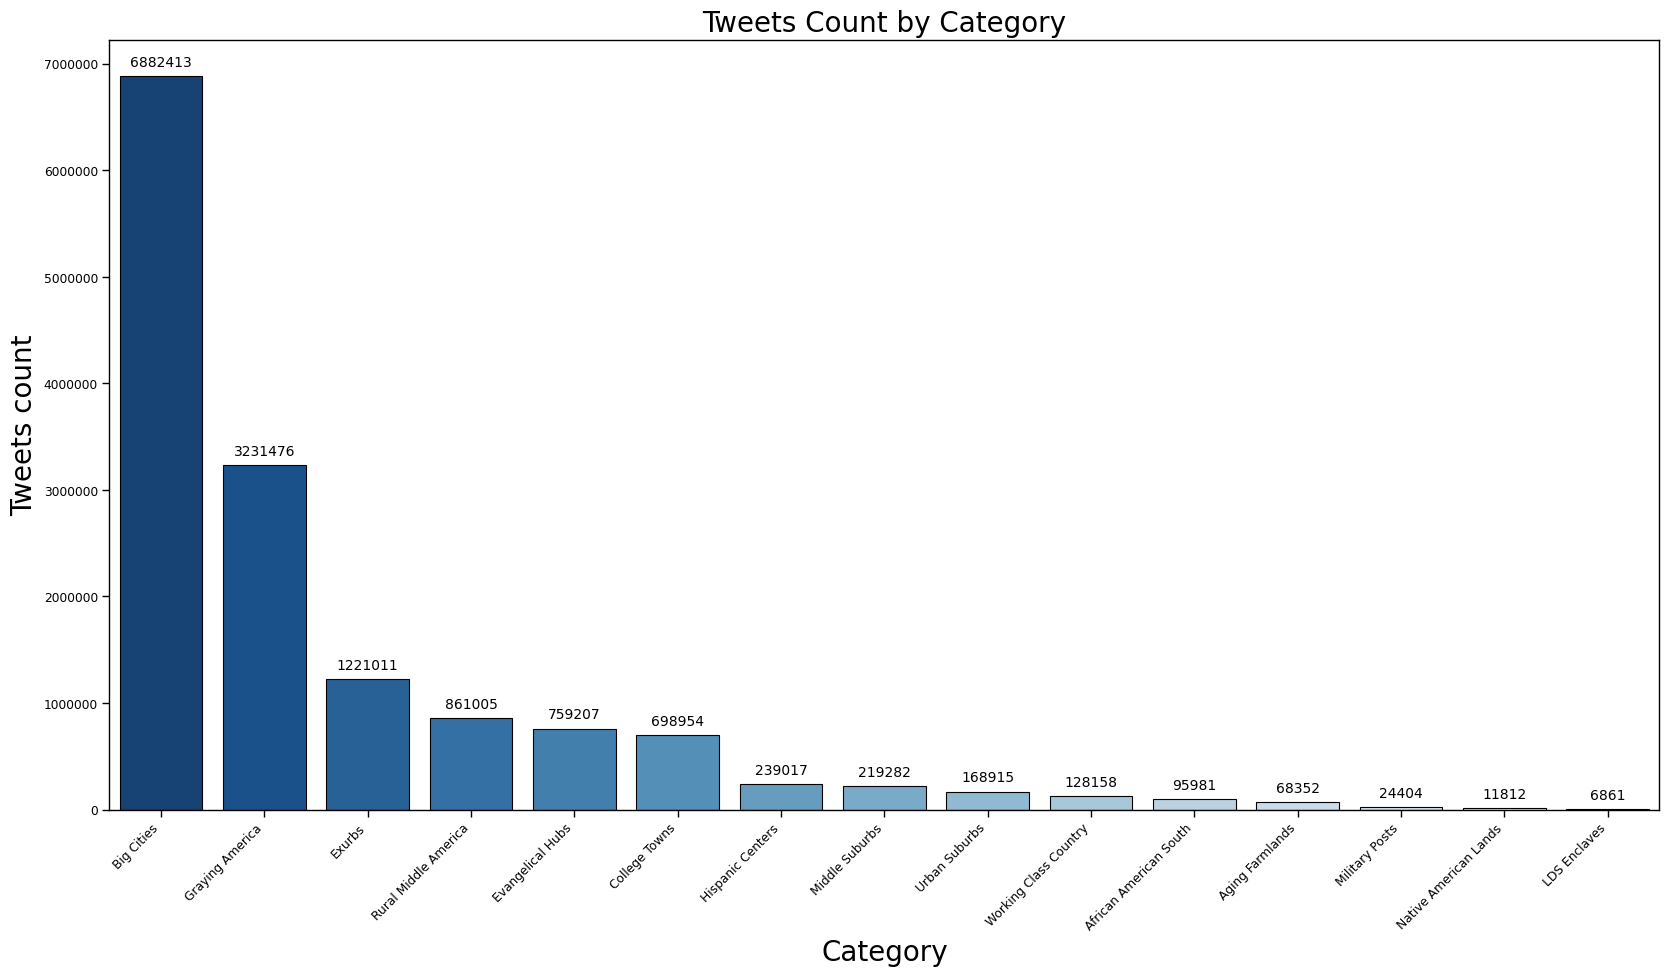

In [60]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='category', y='counts', data=tweets_per_country, edgecolor = 'black',errorbar=('ci', False), palette='Blues_r')
plt.title('Tweets Count by Category', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%.0f',padding=5, fontsize=10)
plt.ylabel('Tweets count', fontsize=20)
plt.xlabel('Category', fontsize=20)
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

In [2]:
df = pd.read_parquet('/Users/fahad/development/thesis/tweet_sentiment/results_sentiment/ldsEnclaves_sentiment.parquet')

In [3]:
df['label'].value_counts()

label
negative    3345
neutral     2672
positive     844
Name: count, dtype: int64

In [4]:
grouped = df.groupby('date')['label'].value_counts()

In [5]:
unstacked = grouped.unstack(level=1)

<Axes: xlabel='date'>

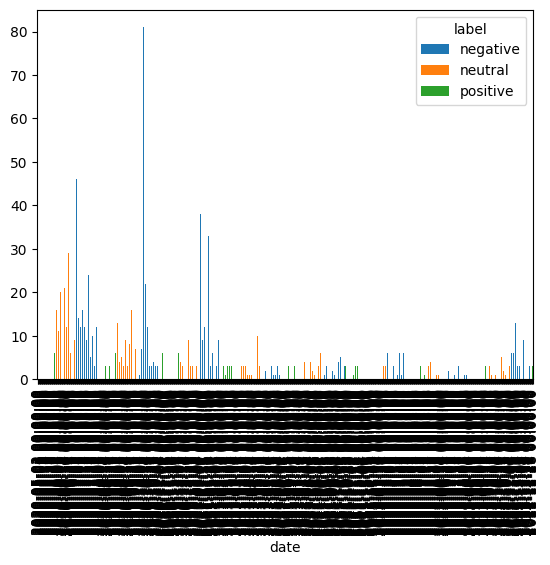

In [6]:
unstacked.plot.bar()